In [338]:
#pip3 install opencv-python
# DATASET DOWNLOADED BELOW
# https://www.kaggle.com/datasets/alxmamaev/flowers-recognition?resource=download 

In [339]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

import glob
import PIL
import tensorflow as tf
import random as rn
import pathlib

from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Activation
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Conv2D 
from keras.layers import MaxPooling2D
from keras.layers import BatchNormalization
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential

from tensorflow import keras

import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image


# Nicholas Wilcox
# final

In [340]:
# get the path/directory for DAISIES
daisyDir = "/Users/nicholaswilcox/Desktop/DataScience/final/myFlowers/daisy"
#for images in os.listdir(daisyDir):
 
    # check if the image ends with png
 #   if (images.endswith(".jpg")):
  #      print(images)

In [341]:
# get the path/directory for DAND
dandDir = "/Users/nicholaswilcox/Desktop/DataScience/final/myFlowers/dandelion"
#for images in os.listdir(dandDir):
 
    # check if the image ends with png
 #   if (images.endswith(".jpg")):
  #      print(images)

In [342]:
# get the path/directory for ROSES
roseDir = "/Users/nicholaswilcox/Desktop/DataScience/final/myFlowers/rose"
#for images in os.listdir(roseDir):
 
    # check if the image ends with png
 #   if (images.endswith(".jpg")):
  #      print(images)

In [343]:
# get the path/directory for SUNFLOWERS
sunDir = "/Users/nicholaswilcox/Desktop/DataScience/final/myFlowers/sunflower"
#for images in os.listdir(sunDir):
 
    # check if the image ends with png
 #   if (images.endswith(".jpg")):
  #      print(images)

In [344]:
# get the path/directory for TULIPS
tulipDir = "/Users/nicholaswilcox/Desktop/DataScience/final/myFlowers/tulip"
#for images in os.listdir(tulipDir):
 
    # check if the image ends with png
 #   if (images.endswith(".jpg")):
  #      print(images)

In [345]:
# flower categories:
# daisy
# dandelion
# rose
# sunflower
# tulip


In [346]:
import os
print(os.listdir('/Users/nicholaswilcox/Desktop/DataScience/final/myFlowers'))
# ignore .DS_Store

['.DS_Store', 'daisy', 'rose', 'tulip', 'dandelion', 'sunflower']


In [347]:
x = []
z = []
x_imageSize = 100
y_imageSize = 100
#daisyDir = '/Users/nicholaswilcox/Downloads/myFlowers/daisy'
#roseDir = '/Users/nicholaswilcox/Downloads/myFlowers/rose'
#tulipDir = '/Users/nicholaswilcox/Downloads/myFlowers/tulip'
#dandDir = '/Users/nicholaswilcox/Downloads/myFlowers/dandelion'
#sunDir = '/Users/nicholaswilcox/Downloads/myFlowers/sunflower'

In [348]:
daisy_size = len(daisyDir)
# print(daisy_size) -- 47
rose_size = len(roseDir)
# print(rose_size) -- 46
tulip_size = len(tulipDir)
# print(tulip_size) -- 47
dand_size = len(dandDir)
# print(dand_size) -- 52
sun_size = len(sunDir)
# print(sun_size) -- 51


In [349]:
# CREATE FUNCTION OF TRAINING

In [350]:
def assignLabel(img, flowerType):
    return flowerType

In [351]:
def trainDataFunction (flowerType, dir):
    os.getcwd()
    for img in tqdm(os.listdir(dir)):
        label = assignLabel(img, flowerType)
        path = os.path.join(dir, img)
        img = cv2.imread(path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (x_imageSize, y_imageSize))

        x.append(np.array(img))
        z.append(str(label))

In [352]:
#TRAIN DAISY
trainDataFunction('daisy', daisyDir)
print(len(x))

100%|██████████| 764/764 [00:02<00:00, 314.85it/s]

764


In [353]:
#TRAIN ROSE
trainDataFunction('rose', roseDir)
print(len(x))

100%|██████████| 784/784 [00:02<00:00, 300.84it/s]

1548


In [354]:
#TRAIN TULIP
trainDataFunction('tulip', tulipDir)
print(len(x))

100%|██████████| 984/984 [00:03<00:00, 293.21it/s]

2532


In [355]:
#TRAIN dandelion
trainDataFunction('dandelion', dandDir)
print(len(x))

100%|██████████| 1052/1052 [00:03<00:00, 305.92it/s]

3584


In [356]:
#TRAIN sunflower
trainDataFunction('sunflower', sunDir)
print(len(x))

100%|██████████| 733/733 [00:02<00:00, 263.06it/s]

4317


In [357]:
# total of 4317 images

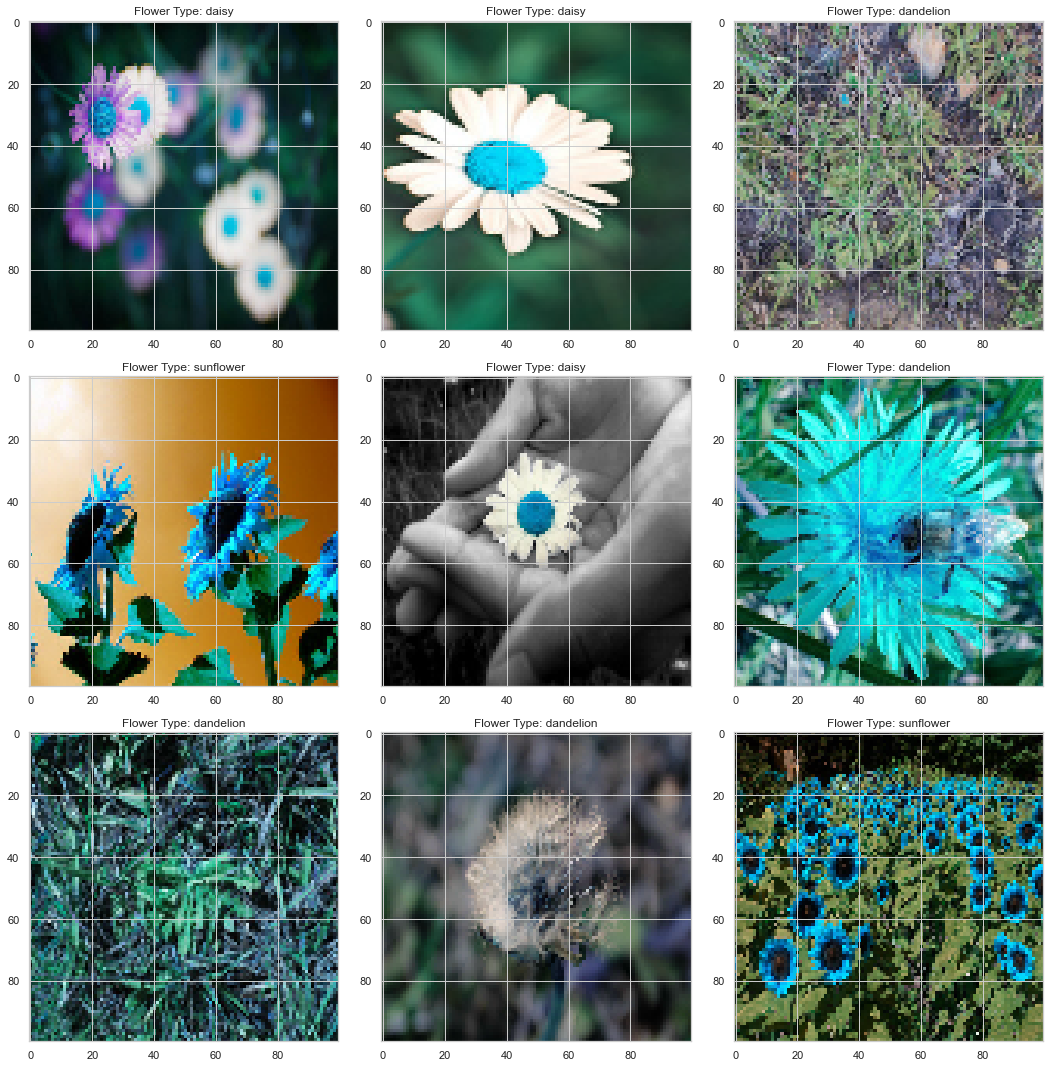

In [358]:
# Print some images

fig, ax = plt.subplots(3, 3)
fig.set_size_inches(15, 15)
for i in range(3):
    for j in range(3):
        index = rn.randint(0, len(z))
        ax[i, j].imshow(x[index])
        ax[i, j].set_title('Flower Type: ' + z[index])
plt.tight_layout()

#im2 = image.copy()
#im2[:, :, 0] = image[:, :, 2]
#im2[:, :, 2] = image[:, :, 0]
#plt.imshow(im2)


In [359]:
# Enable Encoder for Y axis to begin one hot encoding process
# Used to encode target values such as y, noy x which we already have

le = LabelEncoder()
y = le.fit_transform(z)
y = to_categorical(y, 5) # create label for num of classes
x = np.array(x)
x = x/255 # preprocessing


In [360]:
## SPLIT INTO TRAINING SETS
## 80 20 Training Validation

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.20, random_state = 81)

In [361]:
# Create the random seeds

np.random.seed(81)
rn.seed(81)
tf.random.set_seed(81)

_______________________________________________________________________________________________________________________________
_______________________________________________________________________________________________________________________________
_______________________________________________________________________________________________________________________________
_______________________________________________________________________________________________________________________________
DO NOT RERUN ANYTHING ABOVE UNLESS YOU WANT TO WAIT FOR THE DATA TO TRAIN AGAIN
_______________________________________________________________________________________________________________________________
_______________________________________________________________________________________________________________________________
_______________________________________________________________________________________________________________________________
_______________________________________________________________________________________________________________________________

In [400]:
# Creating the CNN

model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same', activation = 'relu', input_shape = (x_imageSize, y_imageSize, 3)))
model.add(MaxPooling2D(pool_size = (2, 2)))

## CONV2D -- This layer creates a convolution kernel that is convolved with the
##           layer input to produce a tensor of outputs.
## 
## MAX POOL -- features are extracted and compressed into a small
##             map, which simplifies the neural network computation complexity,
#              leading to the decrease of the volume of parameters and computation

In [401]:
model.add(Conv2D(filters = 64, kernel_size = (5, 5), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2,2)))

In [402]:
model.add(Conv2D(filters = 64, kernel_size = (3, 3), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2,2)))

In [403]:
model.add(Conv2D(filters = 64, kernel_size = (3, 3), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2,2)))
model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
#model.add(Dense(256, activation='relu'))
model.add(Dense(5, activation = 'softmax'))


In [378]:
#model.add(Flatten())
#model.add(Dense(512))
#model.add(Activation('relu'))
#model.add(Dense(256, activation='relu'))
#model.add(Dense(5, activation = 'softmax'))

In [406]:
# https://machinelearningmastery.com/difference-between-a-batch-and-an-epoch/

batch_size = 128 
# defines the number of samples to work through
# before updating the internal model parameters
epochs = 30 # start small


In [407]:
from keras.callbacks import ReduceLROnPlateau
# ReduceLROnPLateau = reduce learning rate when a metric has stoped improving
# 
# Arguments
#
# monitor: quantity to be monitored.
# factor: factor by which the learning rate will be reduced. new_lr = lr * factor.
# patience: number of epochs with no improvement after which learning rate will be reduced.
# verbose: int. 0: quiet, 1: update messages.
# mode: one of {'auto', 'min', 'max'}. In 'min' mode, the learning rate will be reduced when the quantity monitored has stopped decreasing; in 'max' mode it will be reduced when the quantity monitored has stopped increasing; in 'auto' mode, the direction is automatically inferred from the name of the monitored quantity.
# min_delta: threshold for measuring the new optimum, to only focus on significant changes.
# cooldown: number of epochs to wait before resuming normal operation after lr has been reduced.
# min_lr: lower bound on the learning rate.

In [408]:
reduce_lr = ReduceLROnPlateau(monitor = 'val_acc', factor = 0.2, patience = 3)

In [409]:
## PREVENT OVERFITTING: 

datagen = ImageDataGenerator(
    featurewise_center= False,
    samplewise_center= False,
    featurewise_std_normalization= False,
    samplewise_std_normalization=False,
    zca_whitening= False,
    rotation_range= 10,
    zoom_range=0.1,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=False

)
datagen.fit(xTrain)

In [410]:
model.compile(optimizer=Adam(learning_rate=0.001),loss = 'categorical_crossentropy', metrics=['accuracy'])

## Don't need data augmentation, I have enough of a training set. Need to figure out shape...

In [411]:
model.summary()

## Why is the flatten the last step?? Why is are the other layers afterwards not being read??

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_61 (Conv2D)          (None, 100, 100, 32)      896       
                                                                 
 max_pooling2d_54 (MaxPoolin  (None, 50, 50, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_62 (Conv2D)          (None, 50, 50, 64)        51264     
                                                                 
 max_pooling2d_55 (MaxPoolin  (None, 25, 25, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_63 (Conv2D)          (None, 25, 25, 64)        36928     
                                                                 
 max_pooling2d_56 (MaxPoolin  (None, 12, 12, 64)     

In [412]:
import multiprocessing
History = model.fit_generator(datagen.flow(xTrain, yTrain, batch_size=batch_size), epochs = epochs, steps_per_epoch = xTrain.shape[0] // batch_size, verbose = 1, validation_data =  (xTest, yTest), workers= multiprocessing.cpu_count()) #, validation_steps = 1 )
# Input to reshape is a tensor with 1843200 values, but the requested shape requires a multiple of 7776
#	 [[{{node sequential_6/flatten/Reshape}}]] [Op:__inference_train_function_1216]
# Photos are about 320x240 pixels

<ipython-input-412-8719582365e1>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  History = model.fit_generator(datagen.flow(xTrain, yTrain, batch_size=batch_size), epochs = epochs, steps_per_epoch = xTrain.shape[0] // batch_size, verbose = 1, validation_data =  (xTest, yTest), workers= multiprocessing.cpu_count()) #, validation_steps = 1 )


Epoch 1/30
26/26 [==============================] - 38s 1s/step - loss: 1.4346 - accuracy: 0.3513 - val_loss: 1.2321 - val_accuracy: 0.4769
Epoch 2/30
26/26 [==============================] - 36s 1s/step - loss: 1.2143 - accuracy: 0.4782 - val_loss: 1.1214 - val_accuracy: 0.5440
Epoch 3/30
26/26 [==============================] - 31s 1s/step - loss: 1.1337 - accuracy: 0.5209 - val_loss: 1.0404 - val_accuracy: 0.5706
Epoch 4/30
26/26 [==============================] - 31s 1s/step - loss: 1.0675 - accuracy: 0.5660 - val_loss: 1.1113 - val_accuracy: 0.5648
Epoch 5/30
26/26 [==============================] - 30s 1s/step - loss: 1.0014 - accuracy: 0.5982 - val_loss: 1.0130 - val_accuracy: 0.6030
Epoch 6/30
26/26 [==============================] - 33s 1s/step - loss: 0.9386 - accuracy: 0.6325 - val_loss: 0.9652 - val_accuracy: 0.6250
Epoch 7/30
26/26 [==============================] - 30s 1s/step - loss: 0.9247 - accuracy: 0.6379 - val_loss: 0.9414 - val_accuracy: 0.6227
Epoch 8/30
26/26 [==

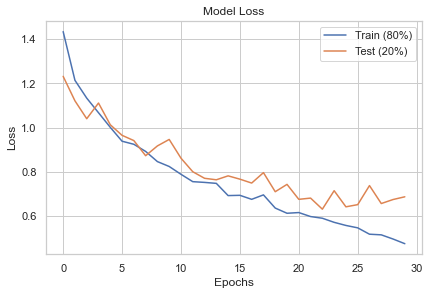

In [413]:
## MODEL LOSS GRAPH

plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train (80%)', 'Test (20%)'])
plt.show()


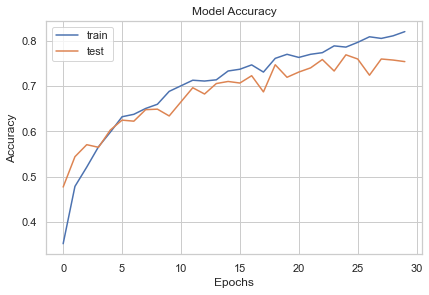

In [414]:
## MODEL ACCURACY GRAPH

plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()
